In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

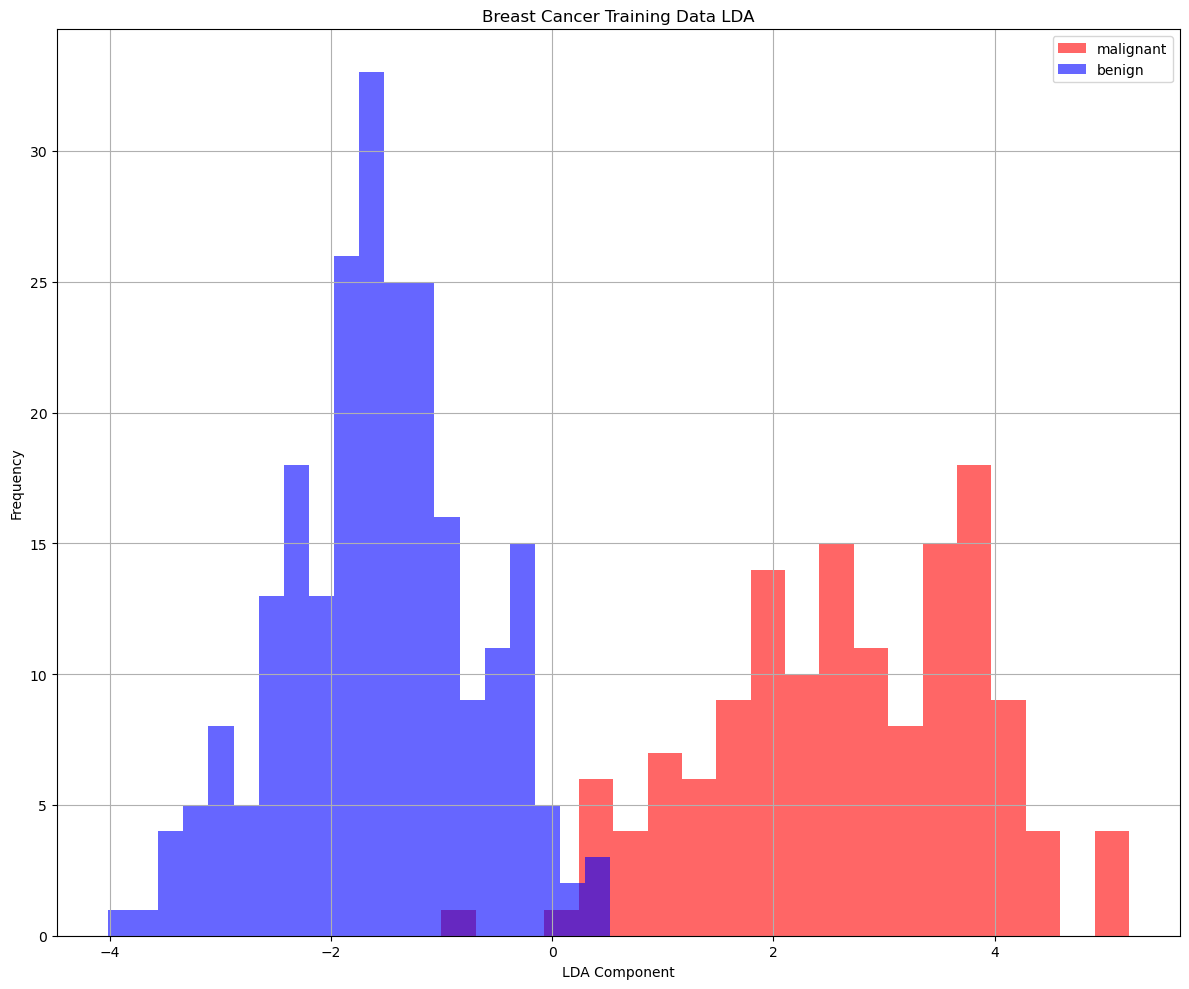

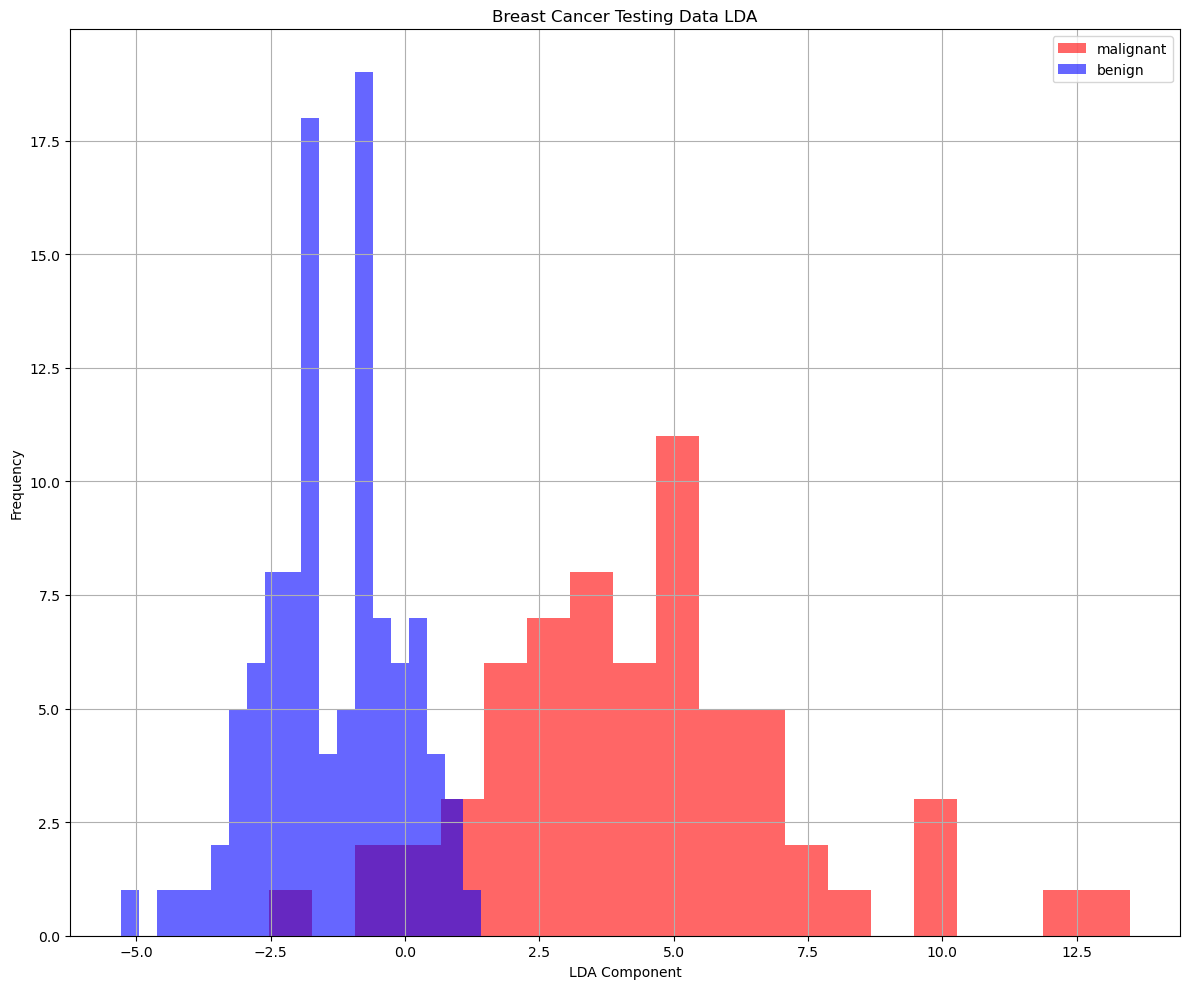

[I 2025-04-27 05:17:12,099] A new study created in memory with name: no-name-14ec466b-4dd7-41eb-81a9-46549f2df9ab
[I 2025-04-27 05:17:19,091] Trial 0 finished with value: 0.9789473684210526 and parameters: {'n_estimators': 7232, 'learning_rate': 0.007208085241052144, 'num_leaves': 67, 'max_depth': 11, 'min_child_samples': 48, 'subsample': 0.9802963526461097, 'colsample_bytree': 0.42287263203966696, 'reg_alpha': 1.8333065824851247e-07, 'reg_lambda': 2.1412477724396228e-08}. Best is trial 0 with value: 0.9789473684210526.
[I 2025-04-27 05:17:23,575] Trial 1 finished with value: 0.9789473684210526 and parameters: {'n_estimators': 5736, 'learning_rate': 0.28538580163313604, 'num_leaves': 12, 'max_depth': 3, 'min_child_samples': 20, 'subsample': 0.5698258843915563, 'colsample_bytree': 0.7509184985067028, 'reg_alpha': 4.408825651175652e-06, 'reg_lambda': 0.19787757755122942}. Best is trial 0 with value: 0.9789473684210526.
[I 2025-04-27 05:17:27,818] Trial 2 finished with value: 0.9789473684

Best trial:
Accuracy: 0.9842105263157895
Best hyperparameters:  {'n_estimators': 8987, 'learning_rate': 0.01120160289055929, 'num_leaves': 26, 'max_depth': 10, 'min_child_samples': 93, 'subsample': 0.4455437237285632, 'colsample_bytree': 0.6276355812704217, 'reg_alpha': 0.0017367342204678874, 'reg_lambda': 3.8268022948794527}


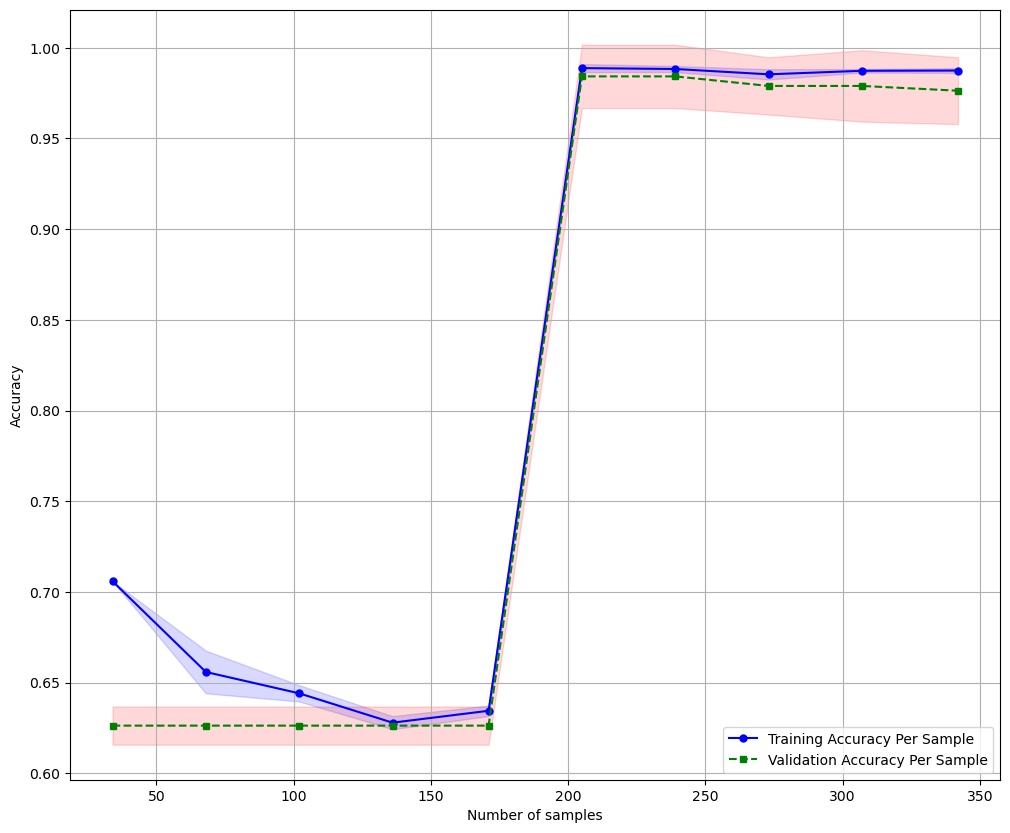

Confusion Matrix
[[60  4]
 [11 96]]
Accuracy: 0.9123, Precision: 0.9600, Recall: 0.8972, F1: 0.9275, AUC: 0.9512


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)